[**Zillow Economics Data**](#https://www.kaggle.com/zillow/zecon)
***
<br><font color=blue>Zillow's Economic Research Team collects, cleans and publishes housing and economic data from a variety of public and proprietary sources. Public property record data filed with local municipalities -- including deeds, property facts, parcel information and transactional histories -- forms the backbone of our data products, and is fleshed out with proprietary data derived from property listings and user behavior on Zillow. </font>
***

<center><img src="http://www.webuyhouseschandler.com/wp-content/uploads/sacramento-home-for-sale.jpg"></center>
In this kernel [plotly](#https://plot.ly) library is used to visualize time series data. The *range selector* in plolty package is fantastic, it will alow to zoom data based on month,year ect. The [Sqaurify](#https://github.com/laserson/squarify) library is used to visualize state vise real estate price. The missingno is nice package for visualize missing value in data set
***

**Stage 1**
1. [Load pacakages](#Load-packages)
2. [Read data](#Read-data)
3. [Missing value](#Missing-value)
4. [Detailed Data anaylsis](#Data-analysis)
5. [Resample](#Resample)
6. [Days On Zillow AllHomes](#Days-On-Zillow-AllHomes)
7. [Homes Sold As Foreclosures Ratio](#Homes-Sold-As-Foreclosures-Ratio)
8. [Median Sold Price Of All Home](#Median-Sold-Price-Of-All-Home)
9. [Price To Rent Ratio](#Price-To-Rent-Ratio)
10. [Home Value By Year](#Home-Value-By-Year)
11. [Percentage Gain or Loss of Sold Home](#Percentage-Gain-or-Loss-of-Sold-Home)
12. [Median value of own home per sqaure fit](#Median-value-of-own-home-per-sqaure-fit)
13. [Zillow Rent Index](#Zillow-Rent-Index)
13. [Rental Price Home per Square foot](#Rental-Price-Home-per-Square-foot)
14. [Median of the value of all homes per square foot](#Median-of-the-value-of-all-homes-per-square-foot)
***

**Stage2**
<br>Here we going to see ARIMA modelling, staionary non-stationary time series, parammeter tuning..
1. [Load Pacakage](#Stage-2)
2. [Stationary Time series property](#Stationary-Time-series-property)
3. [Check stationarity](#Check-Stationarity)
4. [Eliminating Trend and seasonality](#Eliminating-Trend-and-seasonality)
5. [Forcasting time series using ARIMA](#Forcasting-time-series-using-ARIMA)
6. [Grid search method](#Grid-search-method)

## Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

## Read data 

In [2]:
path ='file/'
#path = '../input/'
state_ts = pd.read_csv(path+'State_time_series.csv',parse_dates=['Date'])
print('Number of rows and columns in state ts:',state_ts.shape)

Number of rows and columns in state ts: (13026, 86)


## Missing value

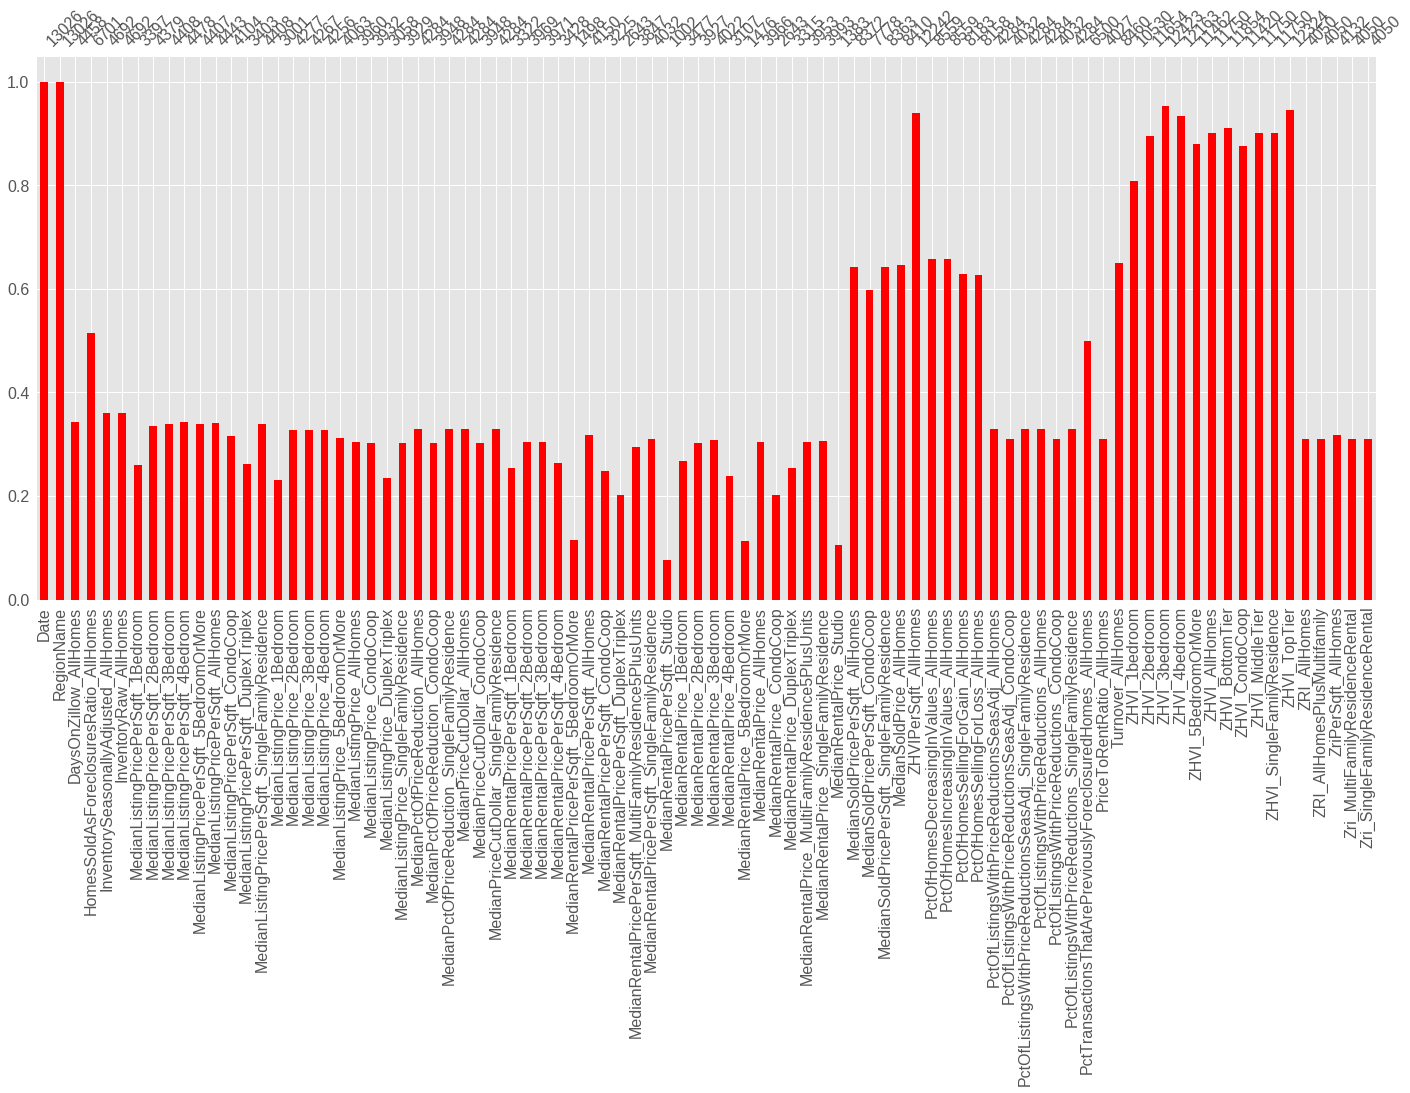

In [3]:
msno.bar(state_ts,color='r')

In [55]:
# Analysis
print('Date range:{} to {}'.format(state_ts['Date'].min(),state_ts['Date'].max()))
print('Number of States',state_ts['RegionName'].nunique())

Date range:1996-04-30 00:00:00 to 2017-08-31 00:00:00
Number of States 52


## Resample

The whole data set is resampled monthly by mean. We can also resample data by sum,count etc, but resampling by mean will give better result. The sample of data availble for total 257 months.

In [4]:
state_month = state_ts.resample('M',on='Date').mean()
state_month = state_month.reset_index()
state_month.shape

(257, 85)

In [5]:
# Sample data by region name
state_vise = state_ts.groupby(['RegionName']).mean()
state_vise.shape

(52, 84)

## Days On Zillow AllHomes

"The median days on market of homes sold within a given month, including foreclosure re-sales. The latest data is for one month prior to the current ZHVI (e.g., if the most current month for ZHVI data is January, the most current month for Days on Zillow data will be December)."

In [58]:
data = [go.Scatter(x=state_month['Date'],y = state_month['DaysOnZillow_AllHomes'])]
#layout = {'title': 'Days On Zillow All Homes', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-09-01']}}
layout = dict(
    title='Days On Zillow All Homes',
    xaxis=dict(
        range=['2010-01-01','2017-09-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-01-01','2017-09-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})

,0,1,2
RegionName,Maine,SouthDakota,Wyoming
DaysOnZillow_AllHomes,NaN,NaN,NaN


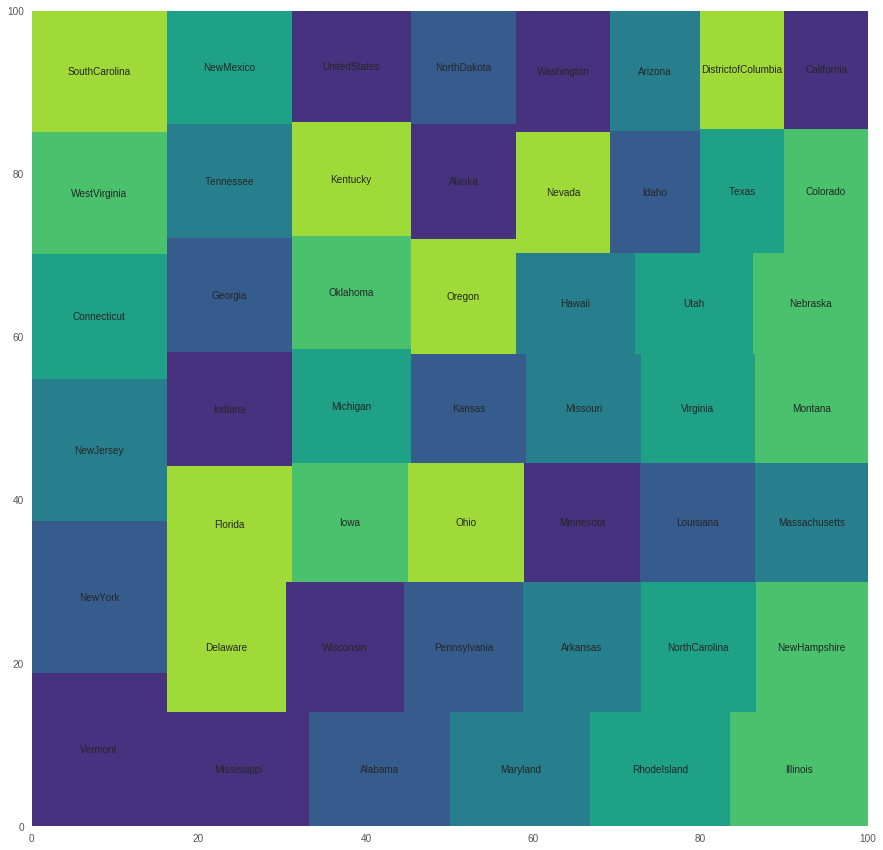

In [59]:
plt.figure(figsize=(15,15))
k = state_vise['DaysOnZillow_AllHomes'].dropna()
k = k.sort_values(ascending=False)
squarify.plot(sizes = k, label=k.index, color=sns.color_palette('viridis'))
k = state_vise['DaysOnZillow_AllHomes']
k = k[k.isnull()]
k.reset_index().T

* The Median days to sale or resale home in zillow website ' data for Maine, SouthDakota, Wyoming states are not available.
* The 'Day on zillow home' data is availble from Jan 2010 to July 2017.
* The median sale /resale of home in zillow is almost same in most of the states.
* The sale or resale of home in year end and year staring is more, as it gradually decrease to least in the middle of the year respective year.
* The sale of home is decrease year by year in zillow.

***
## Homes Sold As Foreclosures Ratio
* "The number of homes (per 10,000 homes) that were foreclosed upon in a given month. A foreclosure occurs when a homeowner loses their home to their lending institution or it is sold to a third party at an auction."

In [60]:
data = [go.Scatter(x = state_month['Date'], y = state_month['HomesSoldAsForeclosuresRatio_AllHomes'],name = 'Sold')]
#layout = {'title': 'Home Sold As Foreclosure Ratio of All Homes', 'font': dict(size=16)}
layout = dict(
    title='Home Sold As Foreclosure Ratio of All Homes',
    font= dict(size=16),
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)
py.iplot({'data':data,'layout': layout})

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
RegionName,Alaska,Florida,Georgia,Idaho,Illinois,Indiana,Kansas,Louisiana,Michigan,Mississippi,...,Montana,NewHampshire,NewMexico,NorthDakota,SouthDakota,Tennessee,Texas,UnitedStates,Utah,Wyoming
HomesSoldAsForeclosuresRatio_AllHomes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


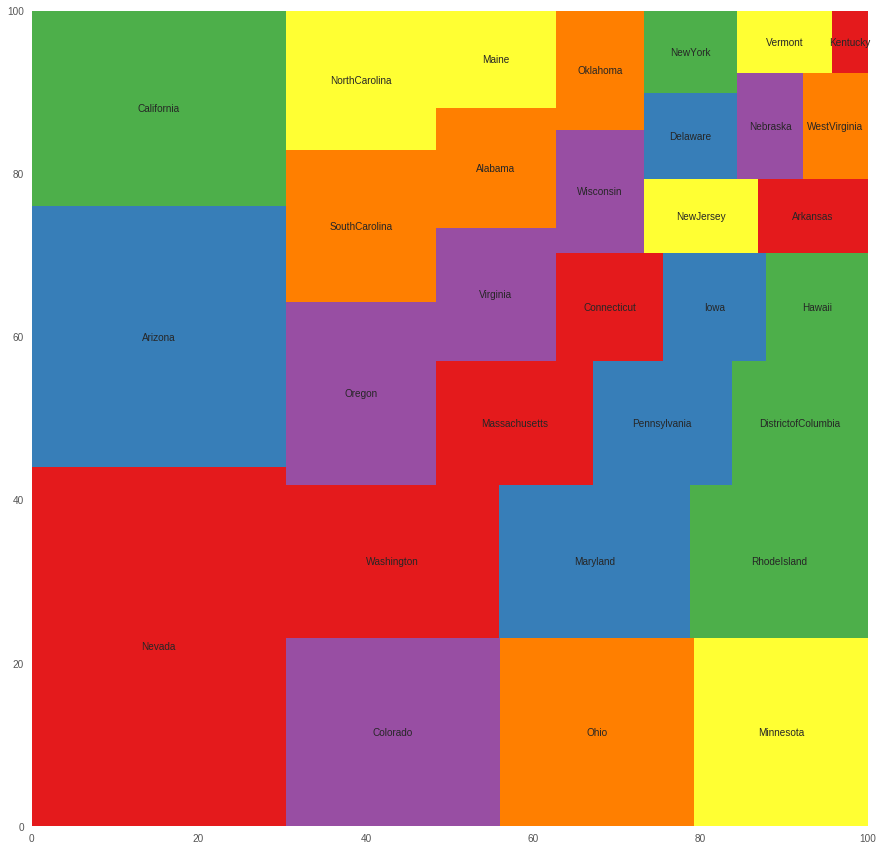

In [61]:
plt.figure(figsize=(15,15))
k = state_vise['HomesSoldAsForeclosuresRatio_AllHomes'].dropna()
k = k.sort_values(ascending=False)
squarify.plot(sizes=k, label=k.index, color=sns.color_palette('Set1'))
# Missing value
k = state_vise['HomesSoldAsForeclosuresRatio_AllHomes']
k = k[k.isnull()]
k.reset_index().T

* The foreclosure of home in the year 2010 is highest
* The ower losses home between year 1996 to 2007 is 1.1 to 2.0 per 10000, after 2007 till 2014 many people lost thier owner ship of the house. It reach maximum 8.3 in oct-2010.
* The peolple living state **Nevada** lost more homes. 
* The data for 21 states are not available.
***
## Median Sold Price Of All Home
* Median of the selling price for all homes sold in a given region

In [62]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianSoldPrice_AllHomes'], name = 'Sold Price All Home')]
layout = {'title': 'Median Sold Price' }

py.iplot({'data':data,'layout':layout})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
RegionName,Alaska,Idaho,Indiana,Kansas,Louisiana,Mississippi,Missouri,Montana,NewMexico,NewYork,NorthDakota,SouthDakota,Tennessee,Texas,UnitedStates,Utah,Wyoming
MedianSoldPrice_AllHomes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


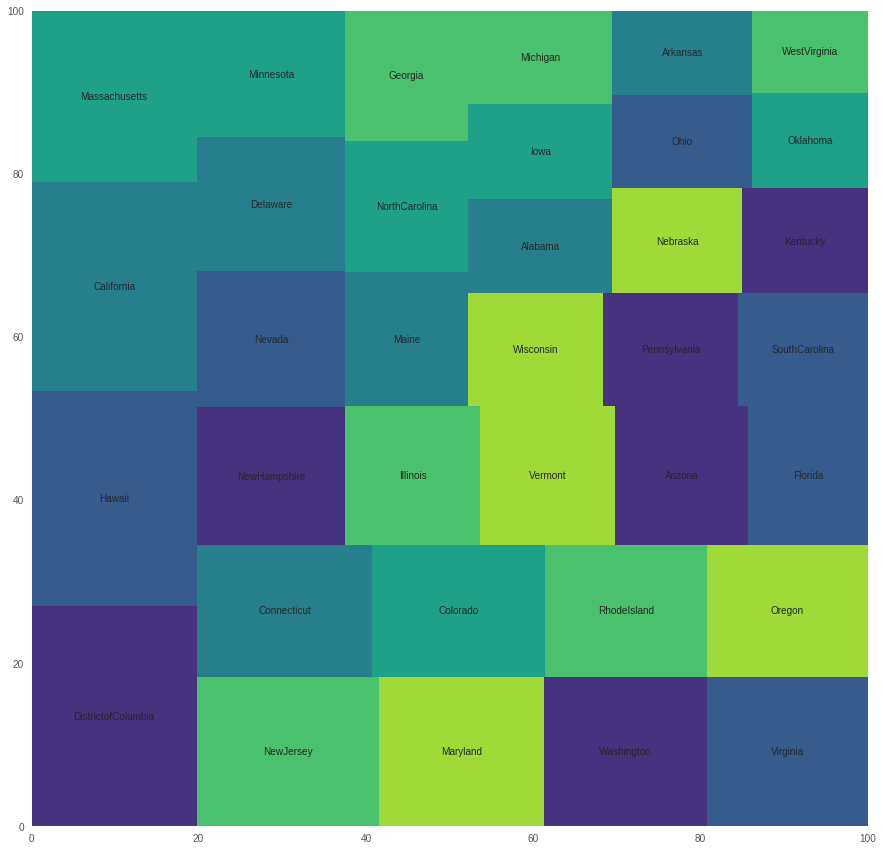

In [63]:
plt.figure(figsize=(15,15))
k = state_vise['MedianSoldPrice_AllHomes'].dropna()
k = k.sort_values(ascending=False)
squarify.plot(sizes=k, label=k.index, color=sns.color_palette('viridis'),)
# Missing value
k = state_vise['MedianSoldPrice_AllHomes']
k = k[k.isnull()]
k.reset_index().T

* The median sold price of house is 105.7k in 1996, it is keep on incresing till 2006.
* The few group of states have similar sales price.
* The sales price for 17 states are not avialable.
***
## Price To Rent Ratio,
"This ratio is first calculated at the individual home level, where the estimated home value is divided by 12 times its estimated monthly rent price. The the median of all home-level price-to-rent ratios for a given region is then calculated."

In [64]:
data = [go.Scatter(x = state_month['Date'],y = state_month['PriceToRentRatio_AllHomes'])]
layout = {'title':'Price/Rent All homes','xaxis':{'range':['2010-01-01','2017-12-01']}}
py.iplot({'data':data,'layout':layout})

,0,1,2
RegionName,Louisiana,UnitedStates,Vermont
PriceToRentRatio_AllHomes,NaN,NaN,NaN


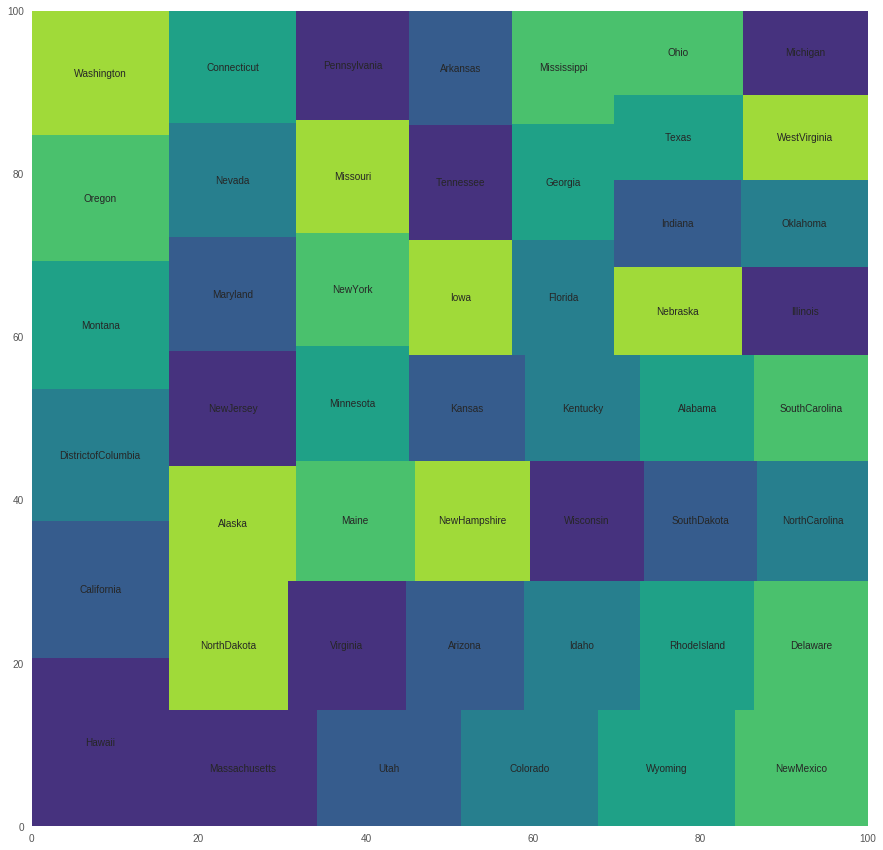

In [65]:
plt.figure(figsize=(15,15))
k = state_vise['PriceToRentRatio_AllHomes'].dropna()
k = k.sort_values(ascending=False)
squarify.plot(sizes=k, label=k.index, color=sns.color_palette('viridis'),)
# Missing value
k = state_vise['PriceToRentRatio_AllHomes']
k = k[k.isnull()]
k.reset_index().T

* The price of home to rent ratio is 10.6 to 11.7.
* The stay in rent house is 10 to 12 time more cheaper than having own house.  
* The price of home to rent ratio is not much difference in most of the states.
* The ratio for 3 states are not avialable.
***

## Home Value By Year
* PctOfHomesDecreasingInValues,The percentage of homes in an given region with values that have decreased in the past year
* PctOfHomesIncreasingInValues,The percentage of homes in an given region with values that have increased in the past year

In [66]:
data = [go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesDecreasingInValues_AllHomes'],name = 'Decreasing'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesIncreasingInValues_AllHomes'], name = 'Increasing'),
       ]
       
layout = {'title': 'Percentage Increse vs Decressing Value Of Homes', 'font': dict(size=16),}

py.iplot({'data':data,'layout': layout})

* The year 2008 is year of recession, so value of home decreased so much.
***
## Percentage Gain or Loss of Sold Home
* PctOfHomesSellingForGain,The percentage of homes in an area that sold for a price higher than the previous sale price
* PctOfHomesSellingForLoss,The percentage of homes in an area that sold for a price lower than the previous sale price

In [67]:
data = [go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesSellingForGain_AllHomes'], name = 'Selling Gain'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesSellingForLoss_AllHomes'], name = 'Selling Loss'),
       ]
       
layout = {'title': 'Percentage Gain vs Loss Sold of Home ', 'font': dict(size=16),}

py.iplot({'data':data,'layout': layout})

 * The year 2008 is year of recession, so value of home decreased so much.
 * The home sold in zillow with profit is more than 73% to 98%
*** 
# Median value of own home per sqaure fit
* MedianListingPricePerSqft: Median of list prices divided by the square footage of a home

In [70]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Median Listing Price$/sqft', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

* Their are 8 different types home, 1 bedroom house being most popular choice for buyiers.
* The data is available from 2010.
* Duplex Triplex home value is least among the them, beacuase which are in rural/ remote area, where as 1 bedroom is in city area. So 1 bedroom house is in apprtment in city area so it is more expensive.
***
***
# Rent of House
## Zillow Rent Index
A smoothed seasonally adjusted measure of the median estimated market rate rent across a given region and housing type

In [68]:
data = [go.Scatter(x = state_month['Date'], y = state_month['ZRI_AllHomes'], name = 'All Home')   
       ]
layout = {'title': 'ZRI', 'font':{'size':16},'xaxis':{'range':['2010-01-01','2017-10-01']}}
py.iplot({'data':data,'layout':layout})

* The rent of the house never decreased. their is little decrease in the year 2014
* The Median value house stars from 1250 to 1450.
***
# Rental Price Home per Square foot
* MedianRentalPricePerSqft,Median of the rental price per square foot of homes listed for rent on Zillow in a given region

In [24]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianRentalPricePerSqft_Studio'], name = 'Studio'),
       ]
       
layout = {'title': 'Rental Price Home per Square foot', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

* Their are 9 different types home, studio bedroom house being most popular.
* The data is available from 2010.
* 4 ,5 bed room home value is least among the them, where as 1 bedroom is in city area. So 1 bedroom house is in apprtment in city area so it is more expensive.
* The rent of studio is most expensive among all.
***
## Median of the value of all homes per square foot
Median of the value of all homes per square foot. This number is calculated by taking the estimated home value for each home in a given region and dividing it by the home's square footage.

In [25]:
data = [go.Scatter(x = state_month['Date'],y = state_month['ZHVIPerSqft_AllHomes'])]
layout = {'title':'Median of the value of all homes per square foot',}
py.iplot({'data':data,'layout':layout})


# Stage 2
***
## ARIMA : Auto Regressor Integrated Moving Average


In [10]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

***
* Convert date column to type datetime[ns] by using pandas built in fuction
* The data set contains 85 columns, the arima model can handle only one time series data. So will chose one the feature as ts 'MedianSoldPrice_AllHomes'


In [11]:
#state_ts['Date'] = pd.datetime(state_ts['Date'])
state_ts = state_ts.set_index('Date')
ts = state_ts['MedianSoldPrice_AllHomes']
ts.head()

Date
1996-04-30     86725.0
1996-04-30    102300.0
1996-04-30     68550.0
1996-04-30    155725.0
1996-04-30    127845.0
Name: MedianSoldPrice_AllHomes, dtype: float64

***
## Stationary Time series property 

* Time series data is time dependent, sample are taken on constant time interval. Zillow has taken data on every month end.
* Time series will have some form of seasonality trend.
* If time series is stationary will have statistical property such as mean,variance are remains constant over time.
* The covariance of i the term and i+m term should not be a function of time

[Median Sold Price Of All Home](#Median-Sold-Price-Of-All-Home) plot using plolty is above. 

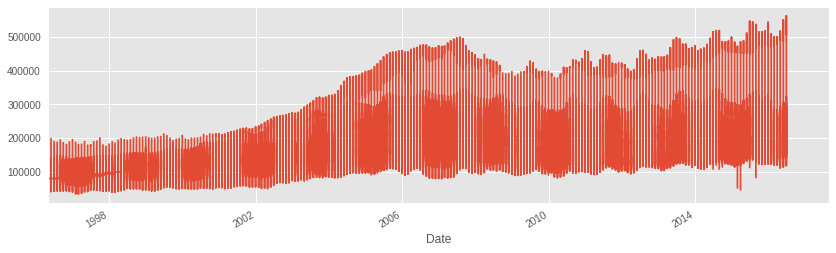

In [12]:
plt.figure(figsize=(14,4))
ts.plot()

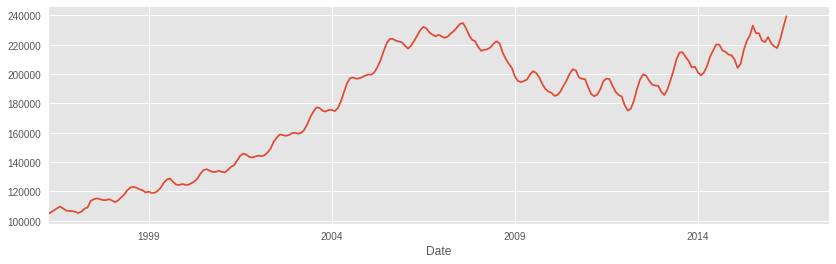

In [13]:
# Resample data by monthly
plt.figure(figsize=(14,4))
ts = ts.resample('M').mean()
ts.plot()

In [14]:
# forward fill for nan values
ts = ts.ffill()

## Check Stationarity
* Plotting rolling statistics: we can plot moving average and moving variance 
* Dickey Fuller test: It is statistical test to check stationarity,
    1. Null Hypothesis H0: Time series is non stationary
    2. Altenate Hypothesis H1: If test statics < critical value reject H0 

Perfom Dickey fuller test
Test Statistic                  -2.113292
p-value                          0.239204
#Lags Used                      12.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


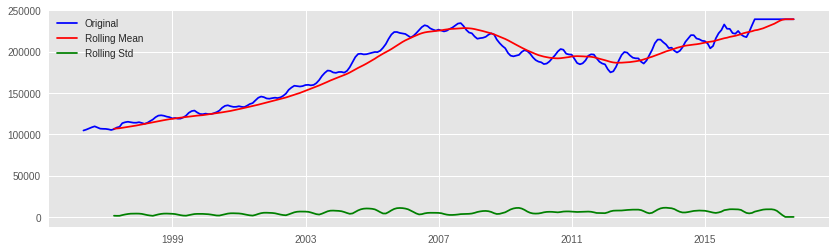

In [15]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = timeseries.rolling(window = 12).mean()
    rol_std = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    plt.figure(figsize=(14,4))
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    plt.legend(loc='best')
    
    # Dickey fuller test
    print('Perfom Dickey fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(ts)

The rolling mean is increasing continualy, so time series is non stationary
In time series test statistics > critacal value of %5, so time series is non stationary.

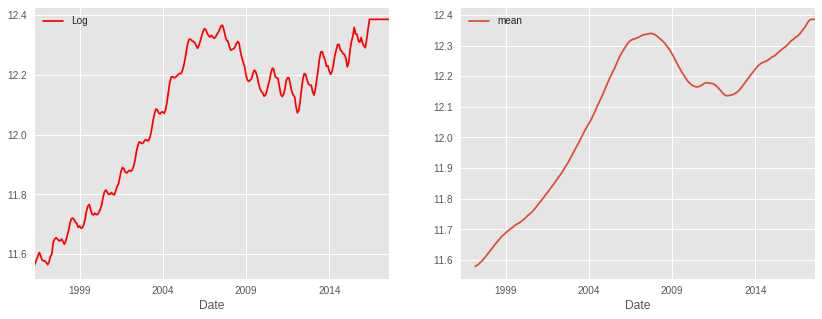

In [16]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = ax.flatten()

ts_log = np.log(ts)
ts_log.plot(ax=ax1, label = 'Log',color = 'r')
ax1.legend(loc = 'best')

ts_ma = ts_log.rolling(12).mean()
ts_ma.plot(ax = ax2, label = 'mean')
ax2.legend(loc = 'best')


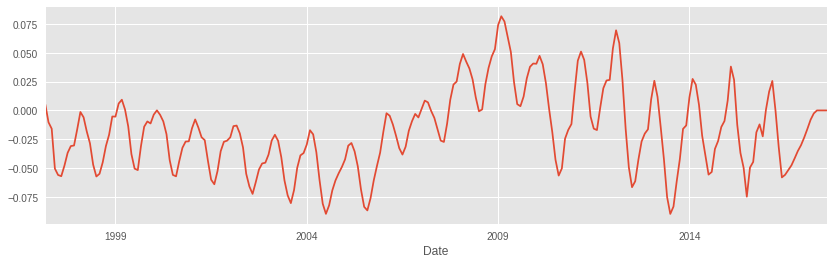

In [18]:
plt.figure(figsize=(14,4))
ts_dif = ts_ma - ts_log
ts_dif = ts_dif.dropna() # fill na
ts_dif.plot()


Perfom Dickey fuller test
Test Statistic                  -2.613145
p-value                          0.090311
#Lags Used                      12.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64


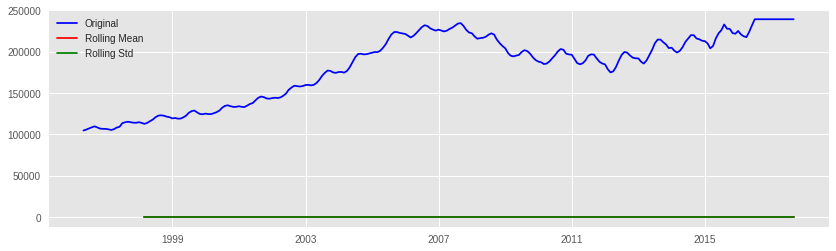

In [19]:
test_stationarity(ts_dif)

## Eliminating Trend and seasonality
1. Differencing: taking difference with perticualar time lag
2. Decomposing: Modelling both trend and seasonality and removing them from the model

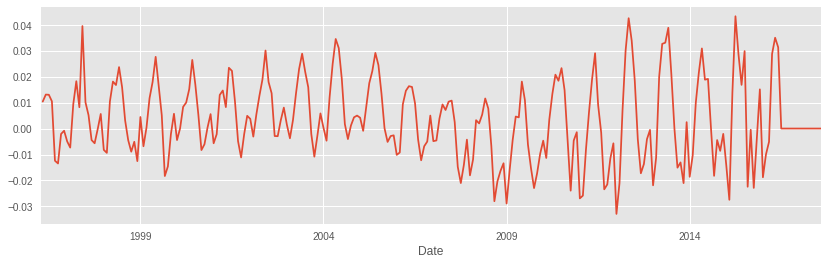

In [20]:
# Differencing
ts_log_dif = ts_log - ts_log.shift()
plt.figure(figsize=(14,4))
ts_log_dif.plot()

Perfom Dickey fuller test
Test Statistic                  -1.614597
p-value                          0.475563
#Lags Used                      11.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


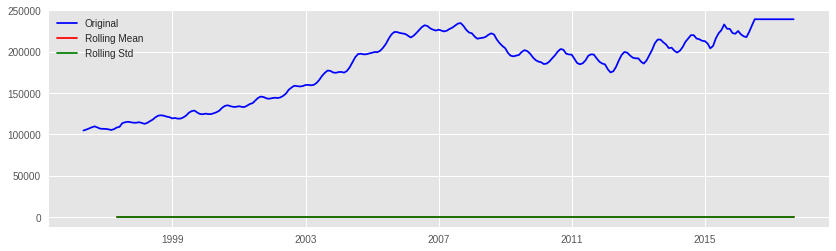

In [21]:
ts_log_dif.dropna(inplace = True)
test_stationarity(ts_log_dif)

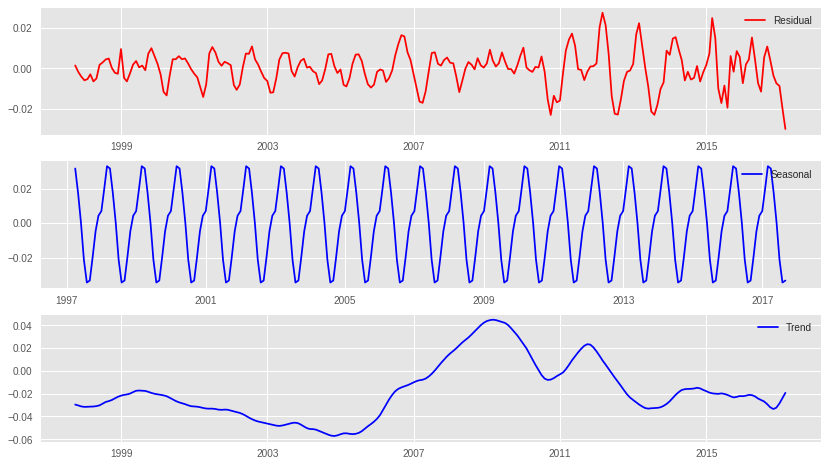

In [22]:
# Decomposing
docom = seasonal_decompose(ts_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(docom.resid,label = 'Residual', color = 'r')
ax[0].legend(loc= 'best')
ax[1].plot(docom.seasonal, label = 'Seasonal', color = 'b')
ax[1].legend(loc = 'best')
ax[2].plot(docom.trend,  label = 'Trend', color = 'b')
ax[2].legend(loc = 'best')

Perfom Dickey fuller test
Test Statistic                -8.836579e+00
p-value                        1.712689e-14
#Lags Used                     5.000000e+00
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64


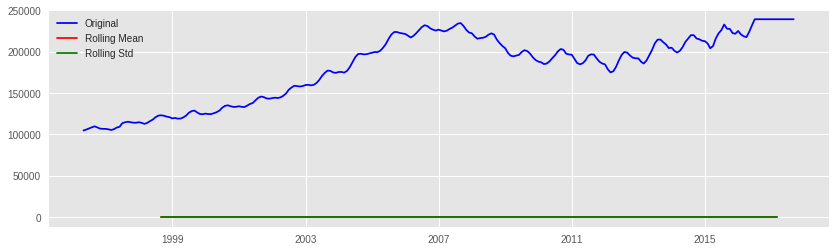

In [86]:
test_stationarity(docom.resid.dropna())

test statistics < critical value & p-value is 0.002
we are getting constant mean and standard deviation.
***
## Forcasting time series using ARIMA

The ARIMA forcasting for stationary time series is nothing but linear equation(like linear regression). The predictor depend on (p, d, q) of Arima model.

Time series linear equation: x(t) = alpha*x(t-1)*error(t) 
* **ARIMA: Auto Regressor Integrated Moving Average**
    1. Number of AR (Auto regressor) term **(p)**: AR term is lag of dependent variable. If p is 3 then predictor for x(t) will be x(t-1)..x(t-3)
    2. Number of MA (Moving Average) term **(q)**: MA term is lag of forcast error of predictor equation. If q is 3 then error for x(t) will be e(t-1)..e(t-3)
    3. Number of Differences **(d)**: The number of times that the raw observations are differenced, also called the degree of differencing.
    

* To determine p and q we will use two plots
    1. Auto Correlation Function **ACF**: It is a measure of correlation between TS and lagged of TS (q)
    2. Partial Auto Correlation Function **PACF**: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.(p)

In [87]:
# ACF
lag_acf = acf(ts_dif,nlags=20)
#PACF
lag_pacf = pacf(ts_dif, nlags=20, method='ols')

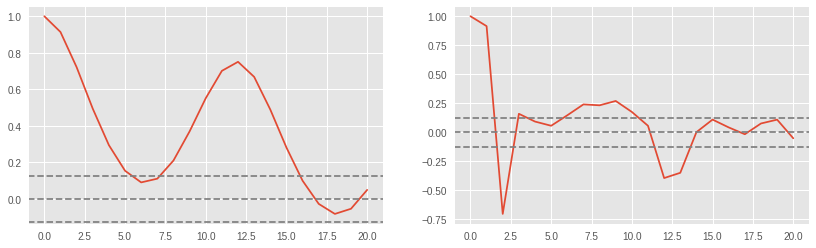

In [88]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(lag_acf)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')

ax2.plot(lag_pacf,)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')

The dotted lines in confidence interval, this can be used to determine **p** and **q**.
    * p: The lag value where the **PACF** chart crosses upper chart for first time.
    * q: The lag value where **ACF** chart crosses upper chart for first time.
Here p = 5, q = 1, order = (5,1,1)

                                 ARIMA Model Results                                  
Dep. Variable:     D.MedianSoldPrice_AllHomes   No. Observations:                  245
Model:                         ARIMA(5, 1, 1)   Log Likelihood                 797.617
Method:                               css-mle   S.D. of innovations              0.009
Date:                        Thu, 11 Jan 2018   AIC                          -1579.235
Time:                                00:34:43   BIC                          -1551.225
Sample:                            04-30-1997   HQIC                         -1567.955
                                 - 08-31-2017                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             4.532e-05      0.000      0.139      0.890      -0.001       0.001
a

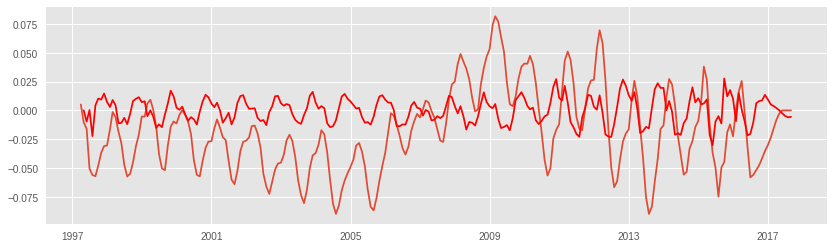

In [23]:
model = ARIMA(ts_dif, order = (5,1,1))
model_fit = model.fit(disp=5)
print(model_fit.summary())
plt.figure(figsize=(14,4))
plt.plot(ts_dif)
plt.plot(model_fit.fittedvalues,color = 'r')

## Grid search method

In [90]:
#Evaluate arima model for (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [91]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [94]:
# Evaluate parameter
p_value = range(0,2)
d_value = range(0,2)
q_value = range(0,2)
evaluate_models(ts,p_value,d_value,q_value,) 

ARIMA(0, 0, 0) MSE=1529617562.104


/home/sudhir/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/sudhir/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0) MSE=14525687.372
ARIMA(0, 1, 1) MSE=10324342.478
Best ARIMA(0, 1, 1) MSE=10324342.478


[(0.8862745098039215, 0.2901960784313726, 0.2),
 (0.20392156862745098, 0.5411764705882353, 0.7411764705882353),
 (0.596078431372549, 0.5568627450980392, 0.8352941176470589),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.984313725490196, 0.7568627450980392, 0.3686274509803922),
 (0.5568627450980392, 0.7294117647058823, 0.25882352941176473),
 (1.0, 0.7098039215686275, 0.7215686274509804)]

## Thank you